In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ushape/ushape.csv


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [3]:
df = pd.read_csv('/kaggle/input/ushape/ushape.csv')
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


This section renames the columns of the dataset to more understandable names,

where 'X' and 'Y' represent the features and 'class' represents the target variable.

This helps in making the dataset easier to work with for further analysis or modeling tasks.

In [4]:
column_new = {
    '3.159499363321345566e-02':'X',
    '9.869877579082642072e-01':'Y',
''  '0.000000000000000000e+00':'class'
}
df= df.rename(columns=column_new)
df.head()


,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


Creating scatter plot using the 'X' and 'Y' features from the dataset, with points colored according to their class.

This visualization helps in understanding the distribution and relationships between features, as well as how different classes are separated or grouped.

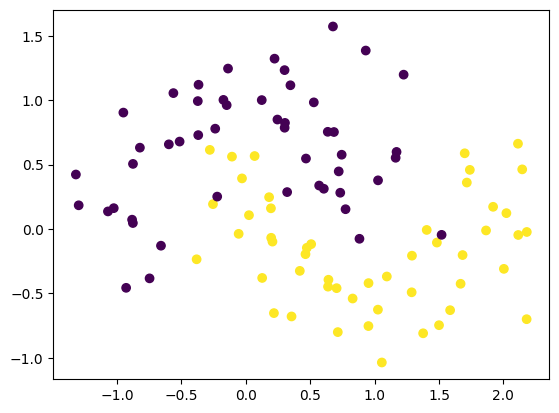

In [6]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [7]:
X= df.iloc[:, 0:2].values
y= df.iloc[:, -1].values

In [11]:
# Display basic statistics
print(df.describe())

# Display the distribution of the target class
print(df['class'].value_counts())


               X          Y      class
count  99.000000  99.000000  99.000000
mean    0.505155   0.221042   0.505051
std     0.894313   0.590909   0.502519
min    -1.318500  -1.035702   0.000000
25%    -0.142935  -0.204478   0.000000
50%     0.474047   0.184147   1.000000
75%     1.129138   0.644323   1.000000
max     2.181372   1.571899   1.000000
class
1.0    50
0.0    49
Name: count, dtype: int64


In [17]:
df.info

<bound method DataFrame.info of            X         Y  class
0   2.115098 -0.046244    1.0
1   0.882490 -0.075756    0.0
2  -0.055144 -0.037332    1.0
3   0.829545 -0.539321    1.0
4   2.112857  0.662084    1.0
..       ...       ...    ...
94  1.699453  0.587720    1.0
95  0.218623 -0.652521    1.0
96  0.952914 -0.419766    1.0
97 -1.318500  0.423112    0.0
98 -1.296818  0.184147    0.0

[99 rows x 3 columns]>

# Correlation Matrix:
The correlation matrix shows the pairwise correlation between different variables in the dataset. The values in the matrix range from -1 to 1:

1 means a perfect positive correlation (as one variable increases, the other increases).

-1 means a perfect negative correlation (as one variable increases, the other decreases)

0 means no correlation (the variables do not affect each other).

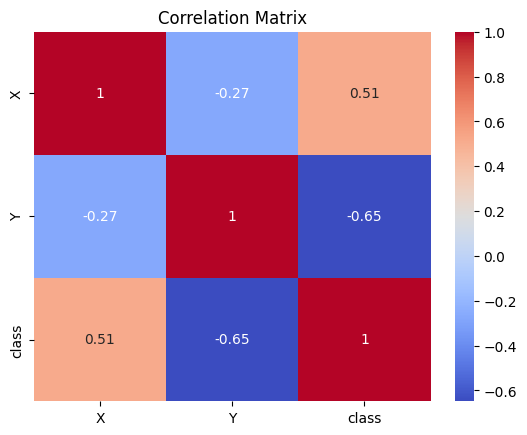

In [12]:
import seaborn as sns

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

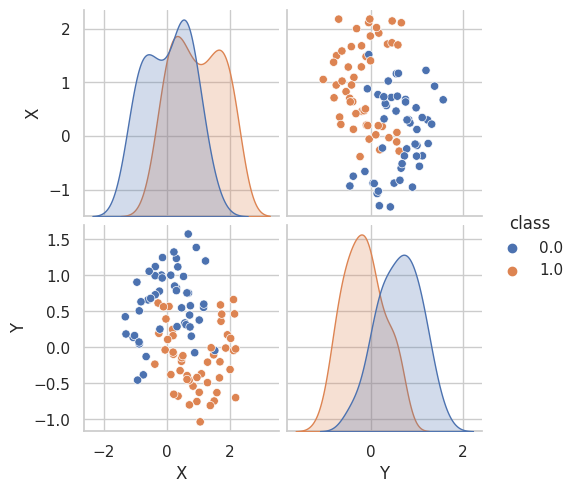

In [19]:
# Pairplot to see the distribution and scatter relationships
sns.pairplot(df, hue='class', diag_kind='kde')
plt.show()


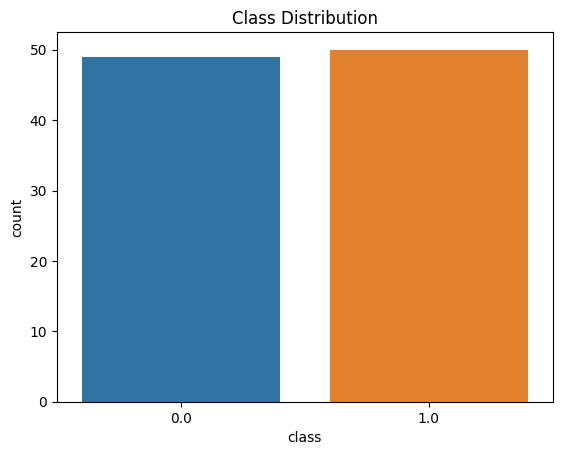

In [15]:
# Bar plot for class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


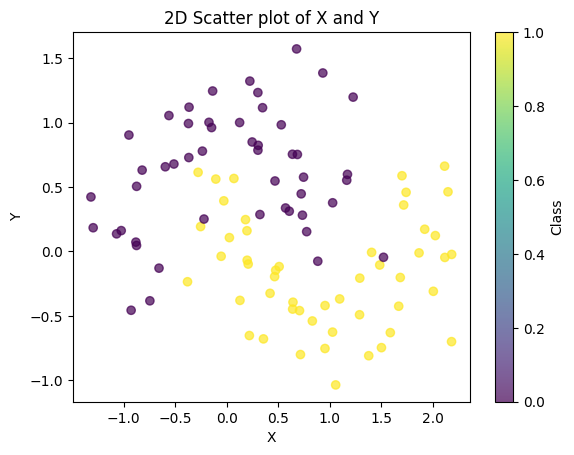

In [16]:
# Scatter plot with a color map
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Class')
plt.title('2D Scatter plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


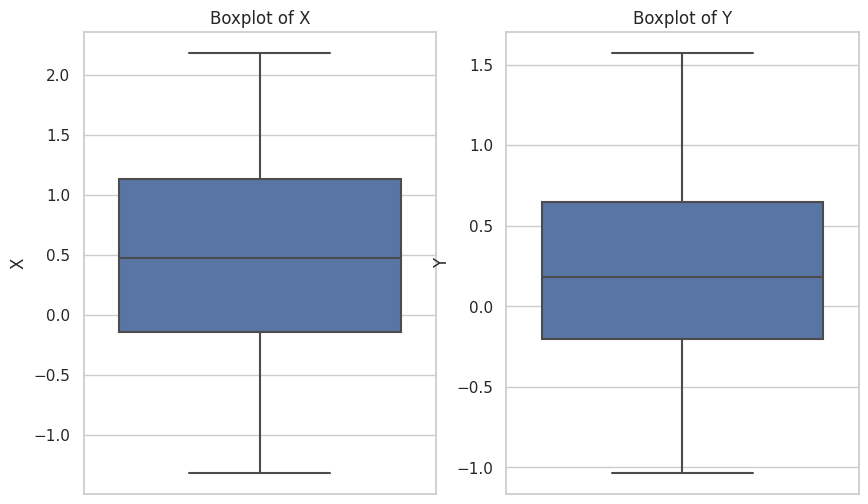

In [20]:
# Box plot for X and Y to identify outliers
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y='X', data=df)
plt.title('Boxplot of X')

plt.subplot(1, 2, 2)
sns.boxplot(y='Y', data=df)
plt.title('Boxplot of Y')

plt.show()


e.



In [27]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.get_weights()

[array([[-0.14823955,  0.6862226 ,  0.57544714,  0.51350623, -0.04515564,
          0.14930469, -0.68460727, -0.6482104 , -0.40466893,  0.5244066 ],
        [-0.2922646 , -0.19643801,  0.14028847, -0.36241028,  0.17159432,
          0.10092533,  0.68263346, -0.28591713,  0.56091017,  0.19201499]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.140915  , -0.27587274, -0.1218366 ,  0.00818676,  0.06349087,
          0.0608781 ,  0.03716683, -0.46499178,  0.26505017,  0.35590184],
        [ 0.06381226,  0.08091092, -0.31818286,  0.42611176,  0.13149351,
          0.1081624 ,  0.4223224 ,  0.50269675,  0.07919711,  0.07994825],
        [ 0.47522378,  0.00343233,  0.30375034, -0.0679405 , -0.41573298,
         -0.32470086, -0.14419141,  0.37550175, -0.43292698, -0.52374953],
        [-0.25227782,  0.20373923, -0.167218  ,  0.05440265, -0.29146224,
          0.33938813, -0.28102764,  0.07231283, -0.47068015, -0.2985189 ],
        [-0.32271

In [29]:
initial_weights = model.get_weights()

In [31]:
# Get initial weights
initial_weights = []

# Xavier Glorot initialization for the first layer (input layer)
initial_weights.append(np.random.randn(2, 10) * np.sqrt(1/2))  # Weight matrix
initial_weights.append(np.zeros(model.layers[0].get_weights()[1].shape))  # Bias vector

# Xavier Glorot initialization for the second layer
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))  # Weight matrix
initial_weights.append(np.zeros(model.layers[1].get_weights()[1].shape))  # Bias vector

# Xavier Glorot initialization for the third layer
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))  # Weight matrix
initial_weights.append(np.zeros(model.layers[2].get_weights()[1].shape))  # Bias vector

# Xavier Glorot initialization for the fourth layer
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))  # Weight matrix
initial_weights.append(np.zeros(model.layers[3].get_weights()[1].shape))  # Bias vector

# Xavier Glorot initialization for the output layer
initial_weights.append(np.random.randn(10, 1) * np.sqrt(1/10))  # Weight matrix
initial_weights.append(np.zeros(model.layers[4].get_weights()[1].shape))  # Bias vector

# Now set the initialized weights back to the model's layers
model.layers[0].set_weights([initial_weights[0], initial_weights[1]])
model.layers[1].set_weights([initial_weights[2], initial_weights[3]])
model.layers[2].set_weights([initial_weights[4], initial_weights[5]])
model.layers[3].set_weights([initial_weights[6], initial_weights[7]])
model.layers[4].set_weights([initial_weights[8], initial_weights[9]])

# Check the model summary after setting the weights
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.get_weights()

[array([[-1.2173674 , -0.6214746 , -0.04878476, -0.07456776, -1.095279  ,
          0.76492417, -0.11455246,  0.496254  , -0.45552072,  0.20871612],
        [-0.38538557, -0.28981006, -0.26434773, -0.05571738,  1.4437115 ,
          0.42954776, -0.8699255 , -0.72268915, -0.55474436,  0.13904282]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.12066053, -0.3112494 , -0.28608164,  0.5161843 ,  0.26279888,
         -0.12400713, -0.24233578,  0.7911244 ,  0.44413456,  0.56847394],
        [ 0.05949285, -0.1932927 , -0.35464573, -0.43817082,  0.26147327,
         -0.2834053 , -0.44703206,  0.4178891 ,  0.21613444, -0.00703491],
        [-0.11899435, -0.1981626 , -0.18930352,  0.4417125 , -0.08549822,
          0.4155275 , -0.19168805,  0.36307225, -0.19781497, -0.47692204],
        [ 0.12138508, -0.7936759 ,  0.40435258,  0.07334194,  0.5570022 ,
          0.673228  ,  0.60627556,  0.25665972, -0.22336608,  0.54924214],
        [-0.10500

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.3774 - loss: 0.6967 - val_accuracy: 0.7500 - val_loss: 0.6867
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5724 - loss: 0.6901 - val_accuracy: 0.8000 - val_loss: 0.6771
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6407 - loss: 0.6838 - val_accuracy: 0.8000 - val_loss: 0.6679
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6265 - loss: 0.6772 - val_accuracy: 0.8000 - val_loss: 0.6588
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6524 - loss: 0.6716 - val_accuracy: 0.8000 - val_loss: 0.6493
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6641 - loss: 0.6631 - val_accuracy: 0.8000 - val_loss: 0.6398
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6807 - loss: 0.6570 - val_accuracy: 0.8000 - val_loss: 0.6305
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6338 - loss: 0.6572 - val_accuracy: 0.8500 - val_loss

In [35]:
model.get_weights()

[array([[-1.0870221e+00, -5.2540696e-01, -1.4959477e-01,  7.6704007e-04,
         -8.7680155e-01,  5.2671176e-01, -6.8200834e-02,  4.6835315e-01,
         -6.0712814e-01,  1.8980357e-01],
        [-2.5666729e-01, -1.5751457e-01, -1.2752253e-01,  8.4862381e-02,
          1.6328404e+00,  2.8242910e-01, -1.0177135e+00, -7.1755892e-01,
         -6.8898410e-01,  1.4382511e-01]], dtype=float32),
 array([-0.11744818,  0.05320992,  0.04772501,  0.04321761,  0.1287969 ,
         0.03943931,  0.08360238,  0.01648034,  0.06400635, -0.10997478],
       dtype=float32),
 array([[ 0.12699859, -0.10757275, -0.36298805,  0.55633396,  0.1689036 ,
         -0.10524143, -0.25388122,  0.6234227 ,  0.44202337,  0.6481778 ],
        [ 0.01859756,  0.02910206, -0.49247456, -0.35981885,  0.20036228,
         -0.22975256, -0.47308943,  0.26572242,  0.18407562,  0.10075516],
        [-0.06543975, -0.01102576, -0.3867216 ,  0.531536  , -0.16369727,
          0.34432745, -0.12273419,  0.23128894, -0.29018763, -0.3

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


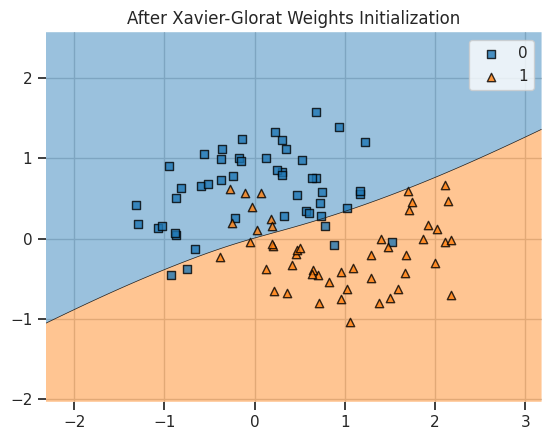

In [37]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.title('After Xavier-Glorat Weights Initialization')
plt.legend()

# He initialization

In [39]:
model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim=2, kernel_initializer= 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer= 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer= 'he_normal'))
model.add(Dense(10, activation = 'relu', kernel_initializer= 'he_normal'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.get_weights()

[array([[-0.5476018 ,  0.00621877, -0.06695785,  0.4908749 ,  0.311663  ,
          1.0109094 , -0.3371306 ,  0.9148736 ,  0.8775599 ,  0.6001037 ],
        [-0.01336505,  0.41894725,  0.0834168 , -1.8766289 ,  0.501195  ,
         -1.0340042 ,  0.6954461 ,  0.7934928 ,  1.4873947 ,  1.2588409 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.10761008, -0.30951965,  0.13774386,  0.24965815, -0.19077721,
          0.543129  , -0.37774116,  0.58023185,  0.4540377 ,  0.02203204],
        [ 0.20647104, -0.9620446 , -0.6080282 , -0.00550041,  0.17214201,
          0.83563775,  0.20324937, -0.20164804, -0.31735316, -0.24758373],
        [ 1.0142068 ,  0.27825528, -0.37462687, -0.22271274,  0.3155134 ,
         -0.19254057, -0.03978743,  0.11155438,  0.8301573 , -0.525471  ],
        [-0.24599826,  0.83077705, -0.5155684 , -0.20070252,  0.28609297,
         -0.9024623 , -0.25492656, -0.14572065,  0.565075  , -0.58415526],
        [ 0.30228

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X,y, epochs = 100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.4315 - loss: 0.7623 - val_accuracy: 0.6000 - val_loss: 0.6861
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3993 - loss: 0.7309 - val_accuracy: 0.5500 - val_loss: 0.6705
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3993 - loss: 0.7125 - val_accuracy: 0.6000 - val_loss: 0.6581
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3993 - loss: 0.7037 - val_accuracy: 0.5500 - val_loss: 0.6482
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4457 - loss: 0.6820 - val_accuracy: 0.5500 - val_loss: 0.6389
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5119 - loss: 0.6851 - val_accuracy: 0.5500 - val_loss: 0.6299
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5456 - loss: 0.6719 - val_accuracy: 0.5000 - val_loss: 0.6211
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5841 - loss: 0.6533 - val_accuracy: 0.5500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


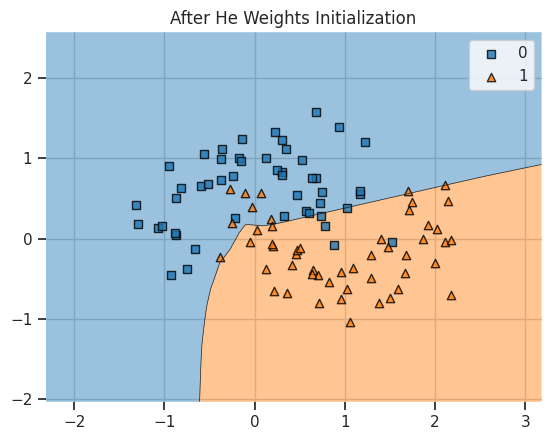

In [42]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
plt.title('After He Weights Initialization')
plt.legend()